<a href="https://colab.research.google.com/github/DeeS17/funnel_and_AB_testing/blob/main/sprint_12_a_b_testing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Content
- Stage 1: Data Pre-processing
- Stage 2: Load Data
  - Data Quality Checking
  - Handle the Missing Values
- Stage 3: Exploratory Data Analysis
  - View Marketing Events that Parallel with The Testing Period
  - View Distribution of Test Group and Test Name
  - Check Overlap Participants
  - Funnel of Events
  - Events per User in Each Group
  - Number of Event by Day of Week
  - Seeing Patterns of Events in Both Group
  - Check EU Participant Proportion an Number of Participants
  - Conclusion of Exploration Data Analysis
- Stage 4: Hypothesis Testing
- Stage 5: Conclusion & Recommendation


# Introduction
International Online Store launches a new recommendation system to increase the funnel of events. I will conduct A/B Testing to check the effect of the new recommendation system.

# Objective
To see if there is a difference in the proportions of event funnels (product page views, product card views, purchases) after 14 days of signing up. The expected results are a 10% increase in the test group compared to the control group.

# Stages
- Data Pre-processing
- Load Data
- Exploratory Data Analysis
- Hypothesis Testing
- Conclusion & Recommendation

# Data Pre-processing

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime, timedelta
from plotly import graph_objects as go
from scipy import stats
import math

# Load Data

In [ ]:
try:
  marketing_events = pd.read_csv('/content/ab_project_marketing_events_us.csv')
  new_users = pd.read_csv('/content/final_ab_new_users_upd_us.csv')
  events = pd.read_csv('/content/final_ab_events_upd_us.csv')
  test_participants = pd.read_csv('/content/final_ab_participants_upd_us.csv')
except:
  marketing_events = pd.read_csv('/datasets/ab_project_marketing_events_us.csv')
  new_users = pd.read_csv('/datasets/final_ab_new_users_upd_us.csv')
  events = pd.read_csv('/datasets/final_ab_events_upd_us.csv')
  test_participants = pd.read_csv('/datasets/final_ab_participants_upd_us.csv')  

## Data Quality Checking

In [ ]:
test_participants.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14525 entries, 0 to 14524
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   user_id  14525 non-null  object
 1   group    14525 non-null  object
 2   ab_test  14525 non-null  object
dtypes: object(3)
memory usage: 340.6+ KB


The data type in `test_participants` is correct and no missing value.

In [ ]:
test_participants.duplicated().sum()

0

There is no duplicate data in `test_participants`.

In [ ]:
new_users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58703 entries, 0 to 58702
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     58703 non-null  object
 1   first_date  58703 non-null  object
 2   region      58703 non-null  object
 3   device      58703 non-null  object
dtypes: object(4)
memory usage: 1.8+ MB


There is no missing value, but the data type in column `first_date` in `new_users` is need to adjust. Because the data type is `object`, supposed to be `datetime`.

In [ ]:
new_users['first_date'] = pd.to_datetime(new_users['first_date'])
new_users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58703 entries, 0 to 58702
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   user_id     58703 non-null  object        
 1   first_date  58703 non-null  datetime64[ns]
 2   region      58703 non-null  object        
 3   device      58703 non-null  object        
dtypes: datetime64[ns](1), object(3)
memory usage: 1.8+ MB


now the data type already correct.

In [ ]:
new_users.duplicated().sum()

0

There is no duplicate data in `new_users`.

In [ ]:
events.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 262000 entries, 0 to 261999
Data columns (total 4 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   user_id     262000 non-null  object 
 1   event_dt    262000 non-null  object 
 2   event_name  261999 non-null  object 
 3   details     60314 non-null   float64
dtypes: float64(1), object(3)
memory usage: 8.0+ MB


Another case, the data type in column `event_dt` in `events` is need to adjust. Because the data type is `object`, supposed to be `datetime`.

In [ ]:
events['event_dt'] = pd.to_datetime(events['event_dt'])
events.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 262000 entries, 0 to 261999
Data columns (total 4 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   user_id     262000 non-null  object        
 1   event_dt    262000 non-null  datetime64[ns]
 2   event_name  261999 non-null  object        
 3   details     60314 non-null   float64       
dtypes: datetime64[ns](1), float64(1), object(2)
memory usage: 8.0+ MB


now the data type already correct.

In [ ]:
events.duplicated().sum()

0

There is no duplicate data in `events`.

In [ ]:
marketing_events.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14 entries, 0 to 13
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   name       14 non-null     object
 1   regions    14 non-null     object
 2   start_dt   14 non-null     object
 3   finish_dt  14 non-null     object
dtypes: object(4)
memory usage: 576.0+ bytes


The data type in column `start_dt` & `finish_dt` in `marketing_events` is need to adjust. Because the data type is `object`, supposed to be `datetime`.

In [ ]:
marketing_events['start_dt'] = pd.to_datetime(marketing_events['start_dt'])
marketing_events['finish_dt'] = pd.to_datetime(marketing_events['finish_dt'])
marketing_events.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14 entries, 0 to 13
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   name       14 non-null     object        
 1   regions    14 non-null     object        
 2   start_dt   14 non-null     datetime64[ns]
 3   finish_dt  14 non-null     datetime64[ns]
dtypes: datetime64[ns](2), object(2)
memory usage: 576.0+ bytes


In [ ]:
marketing_events.duplicated().sum()

0

There is not duplicate data in `marketing_events`.

## Handle the Missing Values

In [ ]:
events.loc[events['event_name'].isna()]

,user_id,event_dt,event_name,details
261999,BE9710C8D19EB08F,2020-12-01,NaN,NaN


1 data is missing in the `event_name` column so I will get rid of that data.

In [ ]:
events.dropna(subset='event_name', inplace=True)
events.loc[events['event_name'].isna()]

,user_id,event_dt,event_name,details


missing values in `event_name` already gone, next I will check in `details` column. 

In [ ]:
events.loc[events['details'].isna(), 'event_name'].unique()

array(['product_cart', 'product_page', 'login'], dtype=object)

It turns out that the missing value in the column `details` is because the `event_name` is not `purchase`, so the `details` value does not exist. Therefore I will replace the missing values in the `details` column with the value `0`.

In [ ]:
events.head()

,user_id,event_dt,event_name,details
0,E1BDDCE0DAFA2679,2020-12-07 20:22:03,purchase,99.99
1,7B6452F081F49504,2020-12-07 09:22:53,purchase,9.99
2,9CD9F34546DF254C,2020-12-07 12:59:29,purchase,4.99
3,96F27A054B191457,2020-12-07 04:02:40,purchase,4.99
4,1FD7660FDF94CA1F,2020-12-07 10:15:09,purchase,4.99


In [ ]:
events.loc[events['details'].isna(), 'details'] = 0
events.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 261999 entries, 0 to 261998
Data columns (total 4 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   user_id     261999 non-null  object        
 1   event_dt    261999 non-null  datetime64[ns]
 2   event_name  261999 non-null  object        
 3   details     261999 non-null  float64       
dtypes: datetime64[ns](1), float64(1), object(2)
memory usage: 10.0+ MB


Missing values already filled.

# Exploratory Data Analysis

## View Marketing Events that Parallel with The Testing Period

In [ ]:
test_start = pd.to_datetime('2020-12-07')
activity_duration = 14
user_acquisition_end = pd.to_datetime('2020-12-21')
test_end = user_acquisition_end + timedelta(activity_duration)

In [ ]:
marketing_events.loc[(marketing_events['start_dt'] >= test_start) & (marketing_events['finish_dt'] <= test_end)]

,name,regions,start_dt,finish_dt
0,Christmas&New Year Promo,"EU, N.America",2020-12-25,2021-01-03


It turns out that there is a marketing event that parallels the testing period, it has the possibility of affecting testing.

## View Distribution of Test Group and Test Name

In [ ]:
participants_test_group = test_participants.groupby(['ab_test', 'group']).agg({'user_id': 'nunique'})
participants_test_group

user_id
ab_test                 group         
interface_eu_test       A         5467
                        B         5383
recommender_system_test A         2747
                        B          928

In addition to our test, there was also a parallel with `interface_eu_test`. Next, I will check if there are any overlap participants.

## Check Overlap Participants

In [ ]:
rst_users = test_participants.loc[test_participants['ab_test'] == 'recommender_system_test', 'user_id']
rst_test_n_group = test_participants.loc[test_participants['user_id'].isin(rst_users)].groupby('user_id').agg({'ab_test':'nunique', 'group':'nunique'})
rst_test_n_group.loc[(rst_test_n_group['ab_test'] > 1) | (rst_test_n_group['group'] > 1)]

,ab_test,group
user_id,,
001064FEAAB631A1,2,1
00341D8401F0F665,2,1
0082295A41A867B5,2,2
00E68F103C66C1F7,2,2
00EFA157F7B6E1C4,2,1
...,...,...
FEA0C585A53E7027,2,2
FEC0BCA6C323872F,2,2
FF2174A1AA0EAD20,2,1


There are 887 participants who entered into 2 test groups or 2 experimental groups.

In [ ]:
rst_test_n_group.loc[(rst_test_n_group['ab_test'] < 2) & (rst_test_n_group['group'] > 1)]

,ab_test,group
user_id,,


Participants who entered into 2 experimental groups because they also joined the `interface_eu_test` test group.

In [ ]:
#Filter participants who took part in two test groups.
rst_test_n_group.reset_index(inplace=True)
rst_users_ = rst_test_n_group.loc[rst_test_n_group['ab_test'] < 2, 'user_id']

## Funnel of Events

In [ ]:
events_merge = events.loc[events['user_id'].isin(rst_users_)].merge(test_participants.loc[test_participants['ab_test'] == 'recommender_system_test'], how='left')
events_merge_= events_merge.merge(new_users, how='left')
events_merge_['end_date'] = events_merge_['first_date'] + timedelta(14) #testing end_date is 14 day after sign up.
events_merge_ = events_merge_.loc[events_merge_['event_dt'] <= events_merge_['end_date']] #filter only event after 14 days sign up.
events_merge_['event_dt'] = events_merge_['event_dt'].dt.to_period('D')

In [ ]:
events['event_name'].unique()

array(['purchase', 'product_cart', 'product_page', 'login'], dtype=object)

In [ ]:
events_merge_.head()

,user_id,event_dt,event_name,details,group,ab_test,first_date,region,device,end_date
0,831887FE7F2D6CBA,2020-12-07,purchase,4.99,A,recommender_system_test,2020-12-07,EU,Android,2020-12-21
1,3C5DD0288AC4FE23,2020-12-07,purchase,4.99,A,recommender_system_test,2020-12-07,EU,PC,2020-12-21
2,49EA242586C87836,2020-12-07,purchase,99.99,B,recommender_system_test,2020-12-07,EU,iPhone,2020-12-21
3,A640F31CAC7823A6,2020-12-07,purchase,4.99,B,recommender_system_test,2020-12-07,EU,PC,2020-12-21
4,A9908F62C41613A8,2020-12-07,purchase,9.99,B,recommender_system_test,2020-12-07,EU,PC,2020-12-21


In [ ]:
event_table = events_merge_.pivot_table(
    index='user_id',
    columns='event_name',
    values= 'event_dt',
    aggfunc='min'
)

event_table = event_table[['login', 'product_page', 'product_cart', 'purchase']]
event_table.reset_index(inplace=True)
event_table

event_name,user_id,login,product_page,product_cart,purchase
0,0010A1C096941592,NaT,2020-12-17,NaT,2020-12-17
1,003DF44D7589BBD4,NaT,2020-12-17,2020-12-17,NaT
2,005E096DBD379BCF,NaT,NaT,NaT,2020-12-21
3,006E3E4E232CE760,NaT,2020-12-17,NaT,NaT
4,00C1F5175586DFCF,NaT,2020-12-21,NaT,2020-12-21
...,...,...,...,...,...
2335,FF5A1CD38F5DD996,NaT,2020-12-21,NaT,NaT
2336,FF5B24BCE4387F86,NaT,2020-12-21,NaT,2020-12-21
2337,FF825C1D791989B5,NaT,NaT,2020-12-19,NaT
2338,FF8CF7057415EB29,NaT,2020-12-21,NaT,NaT


In the `event` dataset, thera are `2,340` participants from the `recommender system test` test group. There are many participants who do not enter the `login` stage first. Maybe because they already `login` before `testing` period start.

In [ ]:
event_table.loc[~event_table['login'].isna()]

event_name,user_id,login,product_page,product_cart,purchase
9,015CCC27BDB640E1,2020-12-09,2020-12-09,NaT,NaT
12,0178FA423606B54B,2020-12-08,2020-12-08,NaT,2020-12-08
15,01C17F099908DA14,2020-12-09,NaT,NaT,NaT
17,021E3EC8A37EE2E3,2020-12-07,NaT,NaT,2020-12-07
26,0403647DF3450CE9,2020-12-09,2020-12-09,NaT,NaT
...,...,...,...,...,...
2317,FDC4F5414D325E59,2020-12-09,2020-12-09,NaT,NaT
2324,FE76759FE6BF8C68,2020-12-09,2020-12-09,2020-12-09,2020-12-09
2325,FE9B25977A8537C2,2020-12-10,NaT,NaT,NaT
2331,FF120D67C4BE2DA3,2020-12-07,2020-12-07,NaT,NaT


Of the `2,340` participants, only `525` participants entered via `login` first. This means that maybe a participant can access the `product_page` stage without going through the `login` stage.

In [ ]:
event_table.loc[(~event_table['purchase'].isna()) & (event_table['product_cart'].isna()) | (event_table['product_page'].isna())]

event_name,user_id,login,product_page,product_cart,purchase
0,0010A1C096941592,NaT,2020-12-17,NaT,2020-12-17
2,005E096DBD379BCF,NaT,NaT,NaT,2020-12-21
4,00C1F5175586DFCF,NaT,2020-12-21,NaT,2020-12-21
6,01157AAD4401952B,NaT,2020-12-18,NaT,2020-12-18
7,0145A5A1EC388D99,NaT,NaT,NaT,2020-12-20
...,...,...,...,...,...
2328,FEC8EB9C054264BC,NaT,2020-12-17,NaT,2020-12-17
2329,FEF5165C8A0DC6BD,NaT,2020-12-15,NaT,2020-12-15
2334,FF4456FBA59116E3,NaT,2020-12-17,NaT,2020-12-17
2336,FF5B24BCE4387F86,NaT,2020-12-21,NaT,2020-12-21


In addition, some participants can enter the `purchase` stage without going through `product_page` or `product_cart` first. Maybe the participant has entered the `product_page` or `product_cart` before the `testing` period, and when the `testing` period only remains to continue the next stage.

In [ ]:
step_1 = event_table.loc[~event_table['product_page'].isna()]
step_2 = step_1.loc[(~step_1['product_cart'].isna()) & (step_1['product_cart'] >= step_1['product_page'])]
step_3 = step_2.loc[(~step_2['purchase'].isna()) & (step_2['purchase'] >= step_2['product_cart'])]

In [ ]:
n_product_page = step_1.shape[0]
n_product_cart = step_2.shape[0]
n_purchase = step_3.shape[0]

fig = go.Figure(go.Funnel(
    y = ['product_page', 'product_cart', 'purchase'],
    x = [n_product_page, n_product_cart, n_purchase]
))

fig.update_layout(
    title={
        'text':'Funnel of Event',
        'y':0.9,
        'x':0.5
    }
)

fig.show()

In each funnel event, only about `30%` of participants remain and move on to the next event.

## Events per User in Each Group

In [ ]:
events_per_user = events_merge_.groupby(['user_id', 'group']).agg({'event_name':'count'})
events_per_user.reset_index(inplace=True)
events_per_user

,user_id,group,event_name
0,0010A1C096941592,A,8
1,003DF44D7589BBD4,A,10
2,005E096DBD379BCF,B,2
3,006E3E4E232CE760,A,3
4,00C1F5175586DFCF,A,6
...,...,...,...
2335,FF5A1CD38F5DD996,A,5
2336,FF5B24BCE4387F86,A,6
2337,FF825C1D791989B5,A,4
2338,FF8CF7057415EB29,B,1


In [ ]:
d ={'A_avg_events': events_per_user.loc[events_per_user['group'] == 'A', 'event_name'].sum()/events_per_user.loc[events_per_user['group'] == 'A', 'event_name'].shape[0],
    'B_avg_events': events_per_user.loc[events_per_user['group'] == 'B', 'event_name'].sum()/events_per_user.loc[events_per_user['group'] == 'B', 'event_name'].shape[0]}

avg_events_per_user = pd.DataFrame(data=d, index=[0])
avg_events_per_user

,A_avg_events,B_avg_events
0,4.681143,4.001695


the average event of the control group (A) was higher than the average event of the experimental group (B).

## Number of Event by Day of Week

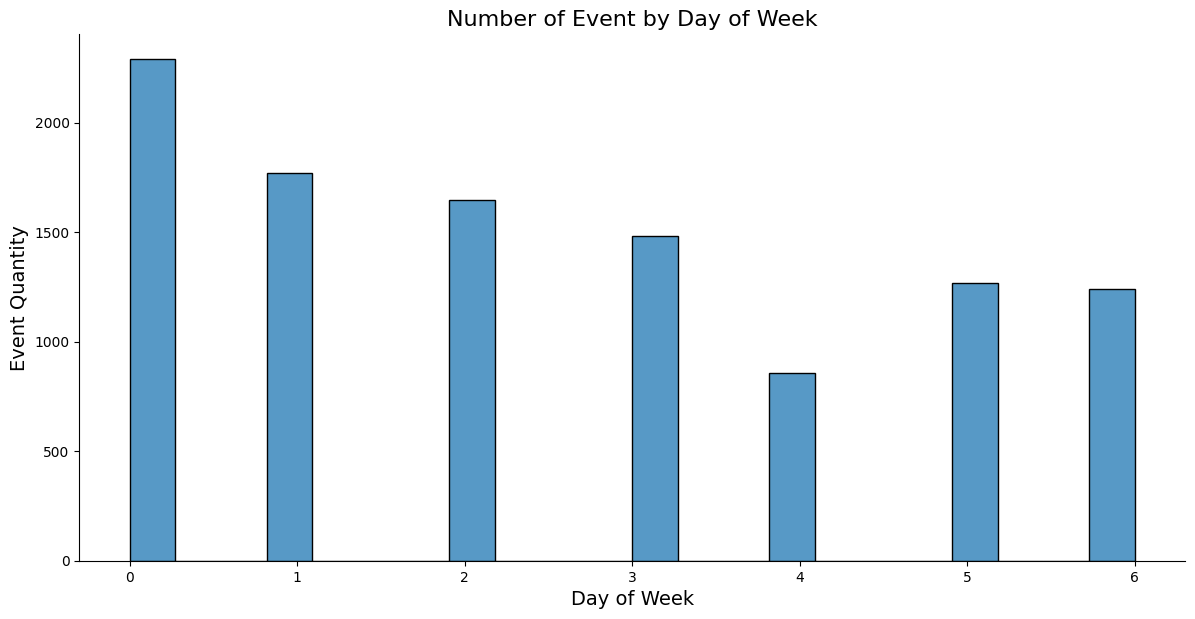

In [ ]:
events_merge_['day_of_week'] = events_merge_['event_dt'].dt.weekday

sns.displot(events_merge_, x='day_of_week', height=6, aspect=2)

plt.title('Number of Event by Day of Week', size=16)
plt.xlabel('Day of Week', size=14)
plt.ylabel('Event Quantity', size=14)
plt.show()

0 is Monday and 6 is Sunday. Activity tends to be higher in the early week, decreasing until Friday, and increase when weekend. 

## Seeing Patterns of Events in Both Groups

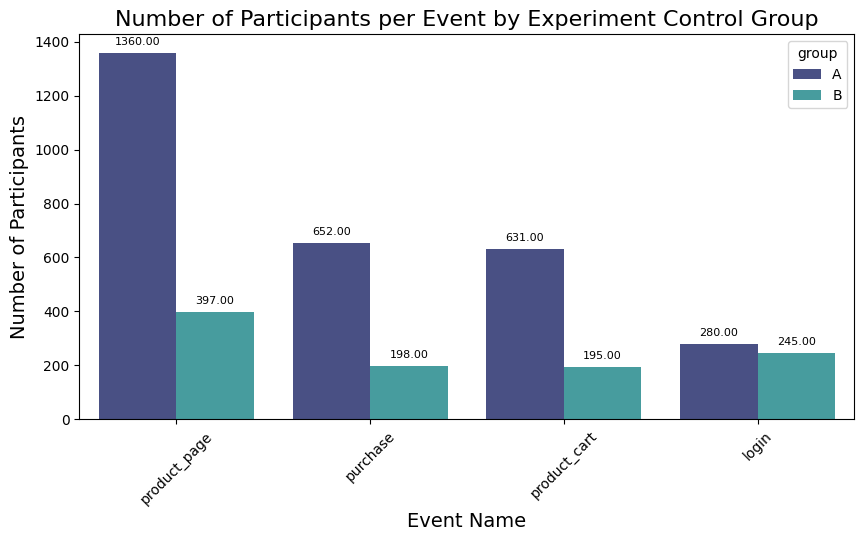

In [ ]:
table_control = events_merge_.pivot_table(
    index = 'event_name',
    columns = 'group',
    values ='user_id',
    aggfunc = 'nunique',
)

table_control.reset_index(inplace=True)
table_control.sort_values(by='A', ascending=False, inplace=True)

table_control2 = pd.melt(table_control, id_vars='event_name', value_vars=['A', 'B'])
table_control2

fig, ax = plt.subplots(figsize=(10, 5))
plots = sns.barplot(data = table_control2, x='event_name', y='value', ax=ax, palette='mako', hue='group')

for bar in plots.patches:
   
    plots.annotate(format(bar.get_height(), '.2f'),
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                   size=8, xytext=(0, 8),
                   textcoords='offset points')


plt.title('Number of Participants per Event by Experiment Control Group', size=16)
plt.xlabel('Event Name', size=14)
plt.ylabel('Number of Participants', size=14)
plt.xticks(rotation = 45)
plt.show()

In almost all events, the number of participants in the control group was about three times as large as that in the experimental group. Exception on `login` event.

In the `product_page`, `product_cart`, and `purchase` events, the participant distribution pattern that occurred was the `product_page` event with the most participants. The `product_cart` and `purchase` events account for about half of the `product_page`. This pattern applies to both the control and experimental groups.

The unique thing is that the `purchase` event has slightly more participants than the `product_cart` event. This confirms previous allegations, that maybe what happened was that there were participants who had entered the `product_cart` stage before the testing period started. The second possibility is that participants can reach the `purchase` event without going through the `product_cart` stage.

## Check EU Participant Proportion and Number of Participants

In [ ]:
region_users = events_merge_.groupby('region').agg({'user_id':'nunique'})
region_users.columns =['n_users']
region_users['%'] = (region_users['n_users'] / region_users['n_users'].sum()*100).round(2)
region_users

,n_users,%
region,,
APAC,32,1.37
CIS,26,1.11
EU,2182,93.25
N.America,100,4.27


It turns out that the proportion of new participants from `EU` is `93.25%`, higher than the targeted `15%`.

In [ ]:
region_users['n_users'].sum()

2340

However, the number of participants who took the `recommender_system_test` experiment was only `2,340`. Below expected by `6,000`.

## Conclusion of Exploration Data Analysis 

Based on the previous data exploration, several points noted. The first point is some `recommender_system_test` participants taking another test (`interface_eu_test`). I excluded participants who took the two tests in parallel because I was afraid the results would be biased.

The second point, in the bar chart, is the number of participants per event according to the experimental group. It seems there were the same proportions for almost all events, except for the `login` event. This will be tested by statistical tests at the next stage.

In addition, the number of active `recommender_system_test` participants in the event dataset was still far below the expected number of participants (6,000 participants).


In [ ]:
new_users.loc[new_users['user_id'].isin(rst_users_)]

,user_id,first_date,region,device
0,D72A72121175D8BE,2020-12-07,EU,PC
22,831887FE7F2D6CBA,2020-12-07,EU,Android
38,4CB179C7F847320B,2020-12-07,EU,iPhone
39,29C92313A98B1176,2020-12-07,APAC,Android
44,7D1BFB181017EB46,2020-12-07,CIS,PC
...,...,...,...,...
58642,87C4963DF01E3B3C,2020-12-20,EU,Android
58652,3CA972F86411CF13,2020-12-20,EU,PC
58664,0F7D49FC184EDCDE,2020-12-20,EU,PC
58680,574ACBC674BC385D,2020-12-20,EU,Mac


# Hypothesis Testing

Before starting the hypothesis testing I need to create a test function and hypothesize first. Here's the hypothesis:
- H0: There is no difference in the proportion of events between control group A and test group B.
- H1: There is a difference in the proportion of events between control group A and test group B.

In [ ]:
table_control.set_index('event_name', inplace=True)
participants_test_group_ = participants_test_group.loc['recommender_system_test']
participants_test_group_.columns = ['n_users']

In [ ]:
def check_hypothesis(successes1, successes2, trials1, trials2, alpha=0.05):
    """ This function to doing hypothesis testing with Z-test method"""
    # proportion of successes in the control group:
    p1 = successes1/trials1

    # proportion of successes in the test group:
    p2 = successes2/trials2

    # proportion of successes in the combined dataset:
    p_combined = (successes1 + successes2) / (trials1 + trials2)

    # difference in proportions in datasets
    difference = p1 - p2

    # calculate statistics in standard deviations of the standard normal distribution
    z_value = difference / math.sqrt(p_combined * (1 - p_combined) * (1/trials1 + 1/trials2))

    # set standard normal distribution (mean 0, standard deviation 1)
    distr = stats.norm(0, 1)

    p_value = (1 - distr.cdf(abs(z_value))) * 2

    print('Proportion of control group: ', p1.round(2))
    print('Proportion of test group: ', p2.round(2))
    print('Difference betweeen test and control group :', (p2-p1).round(2))

    print('p-value: ', p_value.round(2))

    if (p_value < alpha):
        print("Rejecting the null hypothesis: there is a significant difference between the proportions.")
    else:
        print("Fail to reject the null hypothesis: there is no reason to consider that the proportions are any different.")



def check_all_event_hypothesis(users_events_per_group, users_per_group):
    """ This function to doing hypothesis testing with Z-test method to all events"""
    for event in users_events_per_group.index:
        print('Event: '+ event)
        check_hypothesis(users_events_per_group.loc[event, 'A'],
                        users_events_per_group.loc[event, 'B'],
                        users_per_group.loc['A', 'n_users'],
                        users_per_group.loc['B', 'n_users'],
                        )
        print('---------------------------------------------------------')

In [ ]:
check_all_event_hypothesis(table_control, participants_test_group_)

Event: product_page
Proportion of control group:  0.5
Proportion of test group:  0.43
Difference betweeen test and control group : -0.07
p-value:  0.0
Rejecting the null hypothesis: there is a significant difference between the proportions.
---------------------------------------------------------
Event: purchase
Proportion of control group:  0.24
Proportion of test group:  0.21
Difference betweeen test and control group : -0.02
p-value:  0.13
Fail to reject the null hypothesis: there is no reason to consider that the proportions are any different.
---------------------------------------------------------
Event: product_cart
Proportion of control group:  0.23
Proportion of test group:  0.21
Difference betweeen test and control group : -0.02
p-value:  0.22
Fail to reject the null hypothesis: there is no reason to consider that the proportions are any different.
---------------------------------------------------------
Event: login
Proportion of control group:  0.1
Proportion of test gro

Based on the Z-Test test results, only the `product_page` and `login` events differ significantly. In the event of `login` the difference is positive, meaning that there is an increase of `16%` in the test group compared to the control group. However, on the `product_page` event the difference value is negative. This means that there was a decrease of `7%` in the test group compared to the control group.

# Conclusion & Recommendation

Based on the statistical tests that have been done before, most of the part there is no significant difference in the proportions of important events. As for important events that have statistically significant differences, the results are negative (`product_page`). It means the proportion of the test group is even lower than in the control group, which is the opposite of what is expected.

Seen from the statistical tests, means no difference occurred from changing to the recommendation system. However, maybe this could be caused by the number of participants being too few than expected. It may be possible to re-test with larger number participants and a testing period that does not parallel the marketing event that might influence participant behavior.